# __PREDICTING CUSTOMER SUBSCRIPTION IN BANKING: A NEURAL NETWORK APPROACHES__

## __Table of Contents__

1. [Main Objective](#main-objective)
2. [Dataset Description](#dataset-description)
3. [Recommended Approach](#recommended-approach)
   - [Multi-Layer Perceptron (MLP)](#multi-layer-perceptron-mlp)
   - [Feedforward Neural Network (FFNN)](#feedforward-neural-network-ffnn)
4. [Libraries](#libraries)
5. [Exploratory Data Analysis and Feature Engineering](#exploratory-data-analysis-and-feature-engineering)
   - [Missing Values](#missing-values)
   - [Outliers Analysis](#outliers-analysis)
6. [Data Preprocessing](#data-preprocessing)
7. [Synthetic Minority Over-sampling Technique (SMOTE)](#synthetic-minority-over-sampling-technique-smote)
8. [Neural Network Modeling Scenarios](#neural-network-modeling-scenarios)
   - [Proposed Model #1: Multi-Layer Perceptron (Model 1)](#proposed-model-1-multi-layer-perceptron-model-1)
   - [Proposed Model #2: Multi-Layer Perceptron (Model 2)](#proposed-model-2-multi-layer-perceptron-model-2)
   - [Proposed Model #3: Feedforward Neural Network (FFNN Model 3)](#proposed-model-3-feedforward-neural-network-ffnn-model-3)
      - [Fine-Tune Scenario #1](#ffnn-model-3-fine-tune-scenario-1)
      - [Fine-Tune Scenario #2](#ffnn-model-3-fine-tune-scenario-2)
      - [Fine-Tune Scenario #3](#ffnn-model-3-fine-tune-scenario-3)


**Main Objective**
The proposed project of modeling under Deep Learning approaches has been aimed at leveraging informed decision-making in the marketing areas of financial institutions. Therefore, the main objective seeks to predict the probability that institution's customers will contract new financial products and services during campaign events, thereby understanding how effective these campaigns have been.

**Dataset Description**
About Dataset the Bank Client Attributes and Marketing Outcomes dataset taken from Kaggle, offers a comprehensive insight into the attributes of bank clients and the outcomes of marketing campaigns. It includes details such as client demographics, employment status, financial history, and contact methods. Additionally, the dataset encompasses the results of marketing campaigns, including the duration, success rates, and previous interactions with clients. This dataset serves as a valuable resource for analyzing customer behavior, optimizing marketing strategies, and enhancing client engagement in the banking sector.

**Recommended Approach: 
Multi-Layer Perceptron (MLP) and Alternativelly Feed Fordward Neural Network (FFNN)**

Given the nature of the dataset and business question, the MLP is the most feasible approach. Below is a detailed implementation of an MLP model for the given business problem.

## __Libraries__

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn
!pip install tensorflow

In [1]:
# Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
# Load the dataset
data = pd.read_csv('C:/projects/Jupyter_Notebook/datasource/BankClientAttributesMO_Data.csv', index_col = 0)

## __Exploratory Data Analysis and Feature Engineering__

## Missing Values

In [3]:
# Handling missing values and other characteristics in data

missing_values = data.isnull().sum()

# Print the missing values count for each variable
print("Missing values in each variable:")
print(missing_values)

Missing values in each variable:
age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64


In [3]:
data.dropna(inplace=True)  # Drop rows with missing values

In [4]:
# Get the row entries with the last col 'class'
data.iloc[:, -1:].value_counts(normalize=True)

y  
no     0.882979
yes    0.117021
Name: proportion, dtype: float64

<Axes: xlabel='y'>

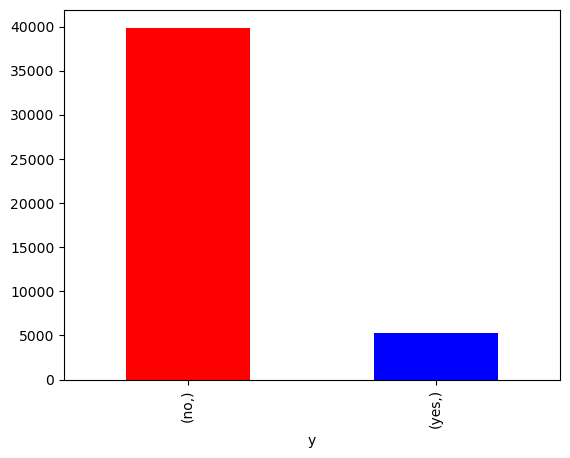

In [5]:
data.iloc[:, -1:].value_counts().plot.bar(color=['red', 'blue'])

In [6]:
# Separate features and target
X = data.drop(columns=['y'])
y = data['y'].map({'no': 0, 'yes': 1})  # Convert target variable to integer

## Outliers analysis

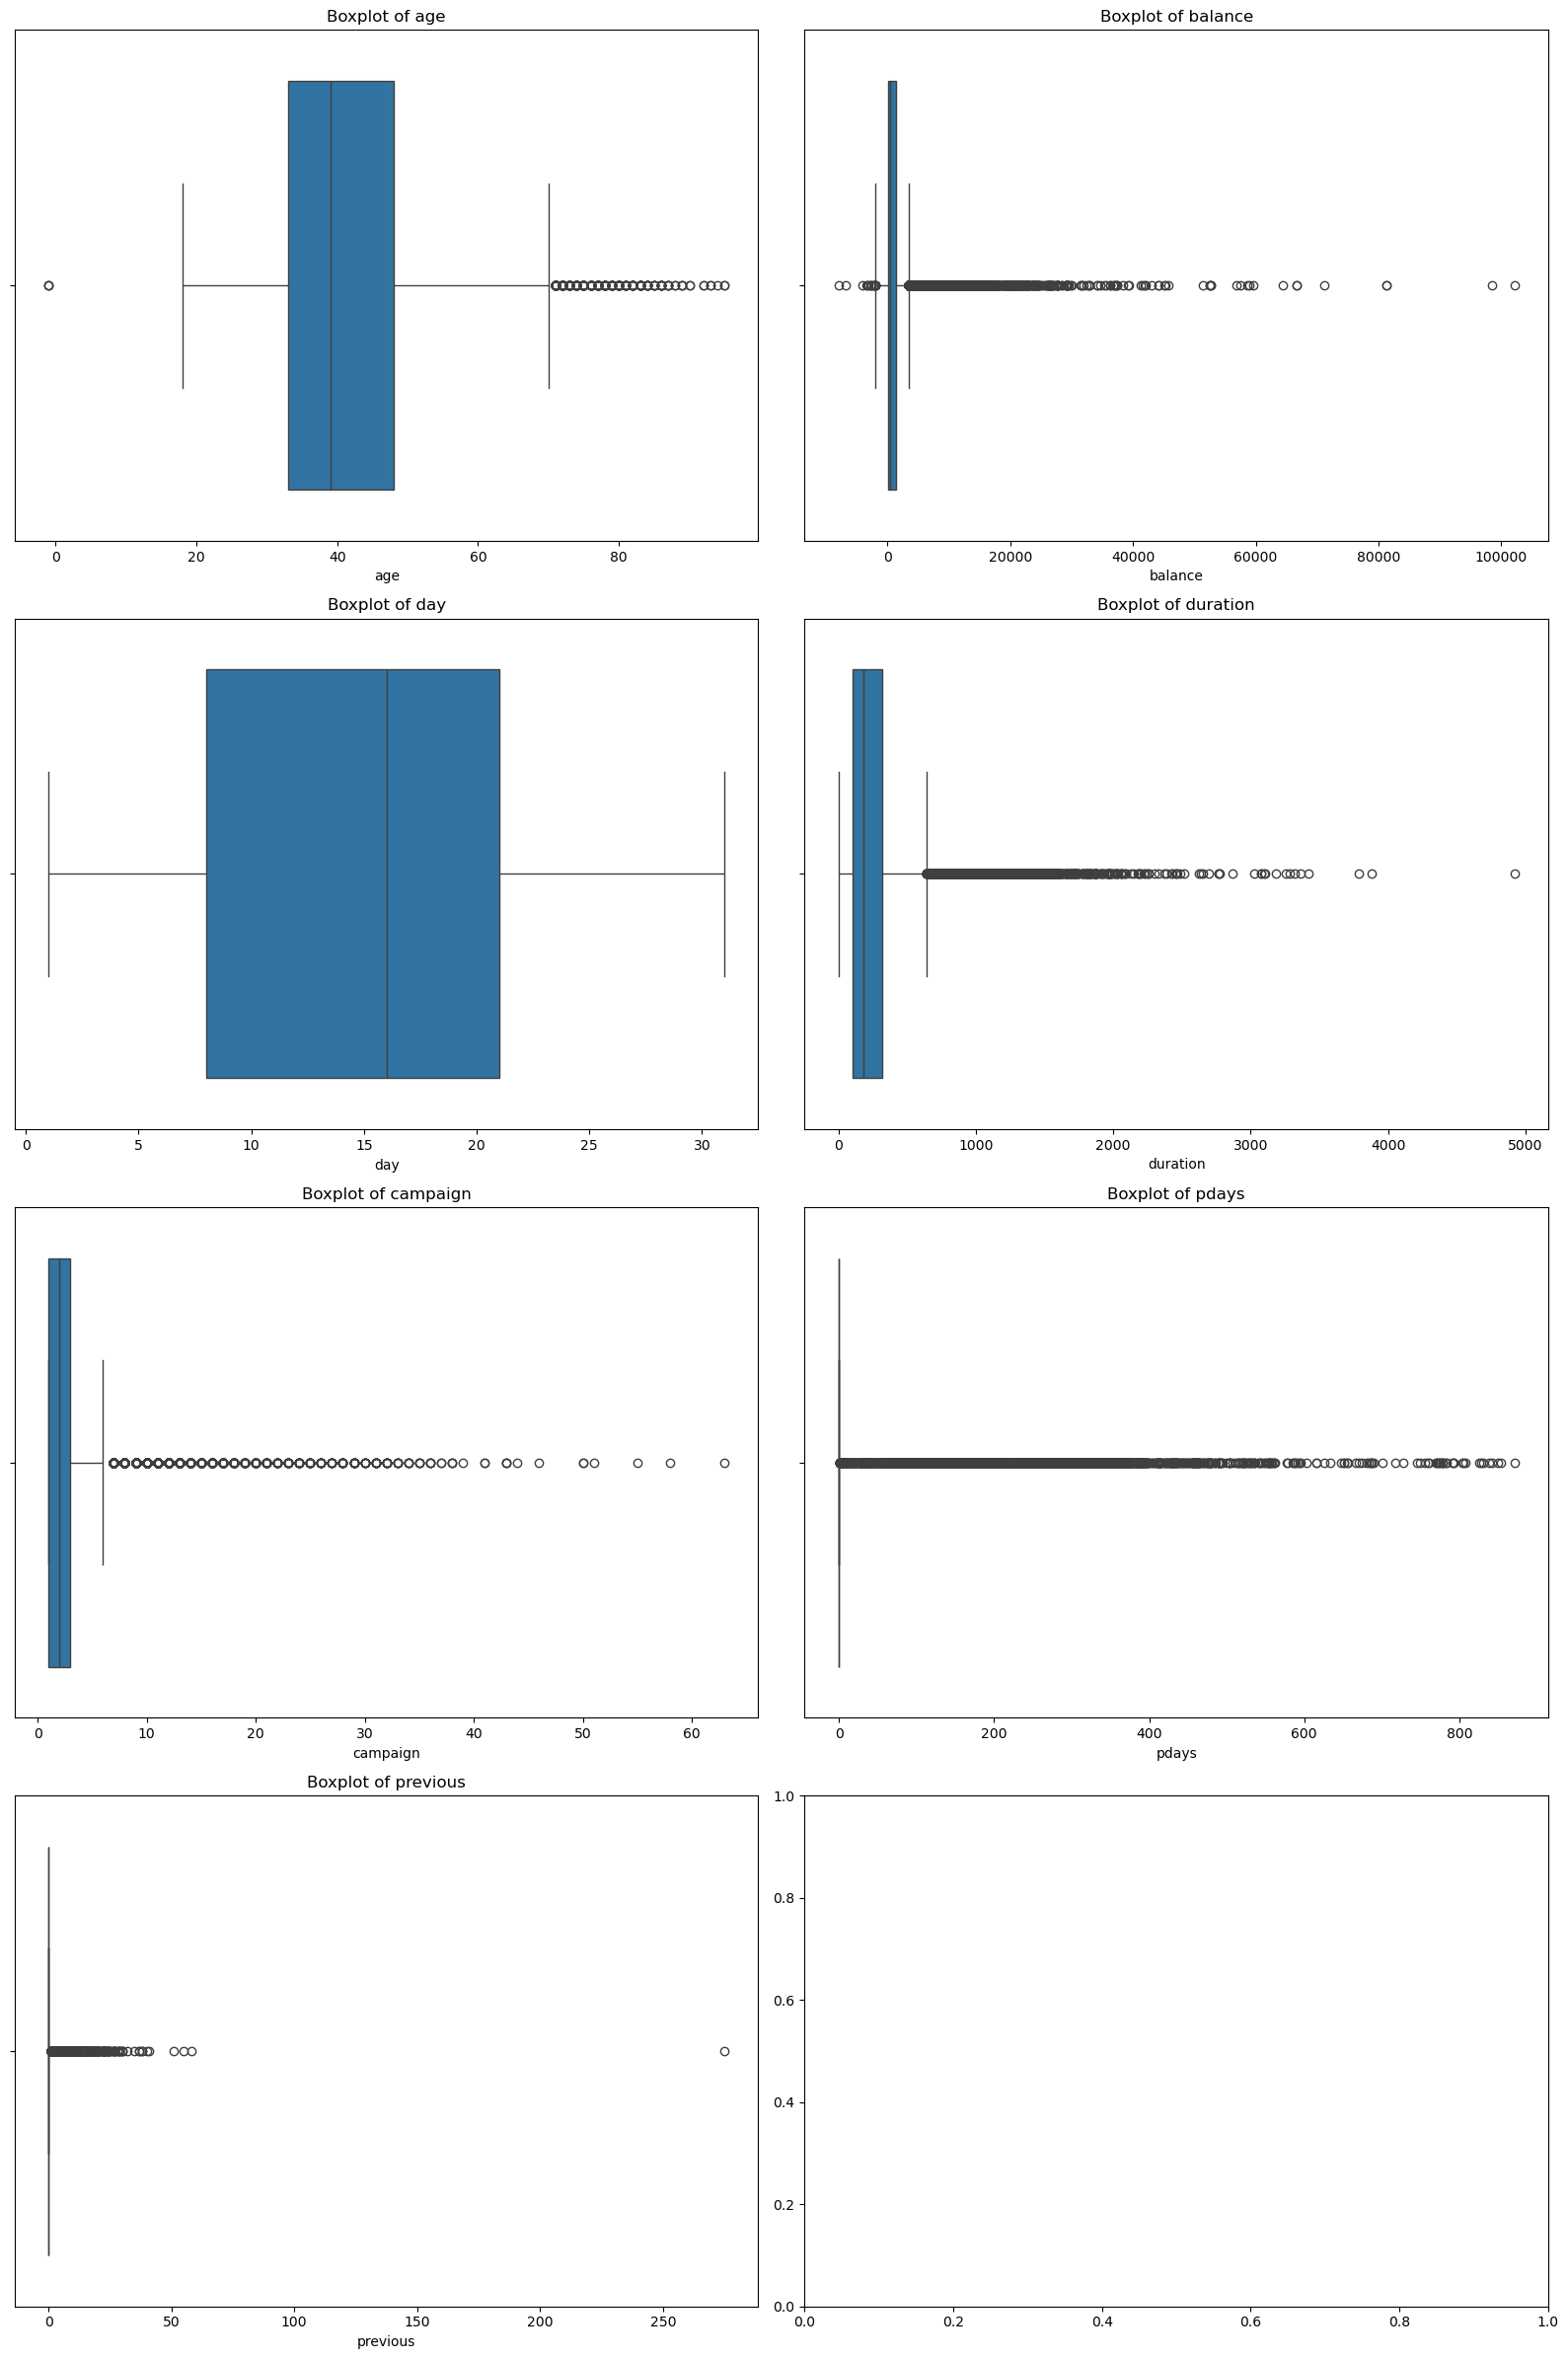

In [7]:
# Outliers analysis

# Calculate the number of rows and columns for subplots

# We can directly select numeric columns if you prefer
num_cols = data.select_dtypes(include='number').columns.tolist()

num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2  # Add 1 and use integer division to round up
num_cols_subplot = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(16, 6*num_rows))

# Plot boxplots for each numeric column separately
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(data=data[col], ax=ax, orient='h')
    ax.set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
# Treatment for outliers in 'campaign' and other variable in data

# Winsorization
def winsorize(series, lower=0.05, upper=0.95):
    lower_bound = series.quantile(lower)
    upper_bound = series.quantile(upper)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Choose the column(s) you want to mitigate outliers for
columns_to_process = ['campaign','pdays']

# Apply winsorization
for col in columns_to_process:
    data[col] = winsorize(data[col])

In [9]:
# Robust treatment for outliers in other numeric variables

# Choose the column(s) you want to mitigate outliers for
columns_to_process = ['age','balance','duration']

# Define a function for Robust Winsorization
def robust_winsorize(series, lower=0.05, upper=0.95):
    median = series.median()
    mad = np.abs(series - median).median()
    lower_bound = median - 3 * mad
    upper_bound = median + 3 * mad
    return series.clip(lower=lower_bound, upper=upper_bound)

# Define a function for Tukey's fences
def tukeys_fences(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply robust winsorization and Tukey's fences
for col in columns_to_process:
    data[col] = robust_winsorize(data[col])
    data[col] = tukeys_fences(data[col])

# Check for outliers after treatment
for col in columns_to_process:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_count = np.sum((data[col] < lower_bound) | (data[col] > upper_bound))
    print(f"Number of outliers in '{col}' after treatment: {outliers_count}")

Number of outliers in 'age' after treatment: 0
Number of outliers in 'balance' after treatment: 0
Number of outliers in 'duration' after treatment: 0


## __Data Preprocessing__

In [10]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Define preprocessor for numeric and categorical features
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
# Fit and transform the training data, transform the validation data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

## __Syntetic Minority Over-sampling Technique (SMOTE)__ 

### SMOTE is an oversampling algorithm that generates "synthetic" or artificial instances to balance the data sample based on the nearest neighbor's rule. This technique is required to handle the unbalanced target variable.

In [14]:
# Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

In [15]:
# Check the types and shapes of processed data
print(f"X_train_processed shape: {X_train_processed.shape}, dtype: {X_train_processed.dtype}")
print(f"X_val_processed shape: {X_val_processed.shape}, dtype: {X_val_processed.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_val shape: {y_val.shape}, dtype: {y_val.dtype}")
print(f"X_train_res shape: {X_train_res.shape}, dtype: {X_train_res.dtype}")
print(f"y_train_res shape: {y_train_res.shape}, dtype: {y_train_res.dtype}")

X_train_processed shape: (36157, 51), dtype: float64
X_val_processed shape: (9040, 51), dtype: float64
y_train shape: (36157,), dtype: int64
y_val shape: (9040,), dtype: int64
X_train_res shape: (63852, 51), dtype: float64
y_train_res shape: (63852,), dtype: int64


## __Neural Network Modeling Scenarios__

## Proposed Model # 1. Multi-Layer Perceptron (Model_1)

In [161]:
# Model Training Function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_res.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.9))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.9))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

# NN Model_1: Constant Learning Rate
model_1 = create_model()
history_1 = model_1.fit(X_train_res, y_train_res, validation_data=(X_val_processed, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50


C:\Users\jwhin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1996/1996 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step - accuracy: 0.5447 - loss: 0.9192 - val_accuracy: 0.7570 - val_loss: 0.5323
Epoch 2/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.6920 - loss: 0.6031 - val_accuracy: 0.7905 - val_loss: 0.3958
Epoch 3/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.7496 - loss: 0.5396 - val_accuracy: 0.7918 - val_loss: 0.3757
Epoch 4/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.7592 - loss: 0.5146 - val_accuracy: 0.7821 - val_loss: 0.3928
Epoch 5/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.7624 - loss: 0.5108 - val_accuracy: 0.7937 - val_loss: 0.3804
Epoch 6/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 769us/step - accuracy: 0.7632 - loss: 0.5066 - val_accuracy: 0.7865 - val_loss: 0.3805
Epoch 7/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 756us/step - accuracy: 0.7674 - loss: 0.5074 - val_accuracy: 0.7835 - val_loss: 0.3882
Epoch 8/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.7635 - loss: 0.50

In [162]:
# Predictions and Performance Metrics
y_pred_1 = model_1.predict(X_val_processed)
l1_preds = (y_pred_1 > 0.5).astype(int)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


## Performance Analysis for NN Model_1

In [163]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_val, l1_preds))
print(f'ROC-AUC Score: {roc_auc_score(y_val, y_pred_1):.4f}')

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      7982
           1       0.36      0.89      0.51      1058

    accuracy                           0.80      9040
   macro avg       0.67      0.84      0.69      9040
weighted avg       0.91      0.80      0.83      9040

ROC-AUC Score: 0.9102


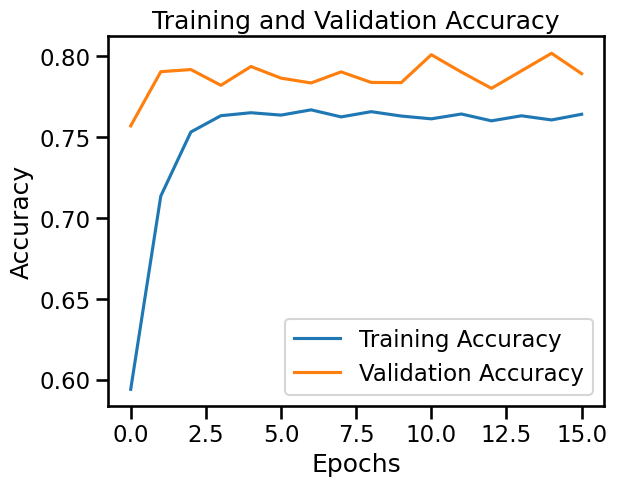

In [164]:
# Assume 'history_1' contains the history of the model with constant LR
history = history_1

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

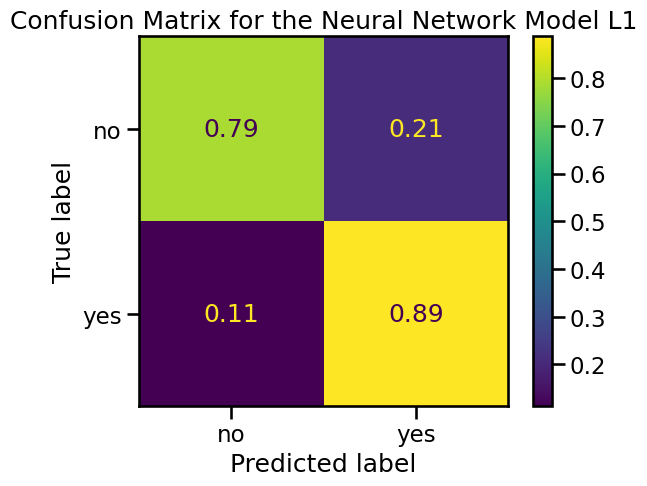

In [165]:
# Confusion Matrix for NN Model_1
cf_matrix = confusion_matrix(y_val, l1_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.title("Confusion Matrix for the Neural Network Model L1")
plt.show()

## __Proposed Model #2. Multi-Layer Perceptron (Model_2)__

## Original Model - 1st Variant:  Model_2

**Effect of LR on training**

When training a neural network model, we typically use a default schedule with a constant LR to update network weights for each training epoch. With a small LR, the training can progress very slowly, and with a larger LR, we often observe overshooting, that is, an undesirable divergent behavior in our loss function. An optimal LR is a trade-off between the two. To help with this, we use the LR scheduler, which is a framework that makes pre-specified adjustments to the LR at set intervals during the training procedure.

**Learning rate schedule**

Keras provides a LR schedule base class that can be used to adapt the LR of our optimizer during training. This can enable our model to learn good weights early on, and be fine-tuned later.

In [166]:
# Learning Rate Scheduler Function
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr*0.1
    elif epoch < 20:
        return lr * 0.01
    else:
        return lr * 0.001

# Model 2: Learning Rate Schedule
model_2 = create_model()
history_2 = model_2.fit(X_train_res, 
                        y_train_res, 
                        validation_data=(X_val_processed, y_val), 
                        epochs=50, 
                        batch_size=32, 
                        callbacks=[early_stopping, lr_scheduler])

Epoch 1/50


C:\Users\jwhin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1996/1996 ━━━━━━━━━━━━━━━━━━━━ 3s 827us/step - accuracy: 0.5287 - loss: 0.9210 - val_accuracy: 0.7808 - val_loss: 0.5578 - learning_rate: 0.0010
Epoch 2/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 753us/step - accuracy: 0.6643 - loss: 0.6218 - val_accuracy: 0.8027 - val_loss: 0.3798 - learning_rate: 0.0011
Epoch 3/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.7213 - loss: 0.5507 - val_accuracy: 0.7992 - val_loss: 0.3702 - learning_rate: 0.0013
Epoch 4/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7403 - loss: 0.5302 - val_accuracy: 0.7856 - val_loss: 0.3940 - learning_rate: 0.0014
Epoch 5/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.7378 - loss: 0.5278 - val_accuracy: 0.8046 - val_loss: 0.3771 - learning_rate: 0.0016


In [167]:
# Predictions
y_pred_2 = model_2.predict(X_val_processed)
l2_preds = (y_pred_2 > 0.5).astype(int)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step


## Performance Analysis for NN Model_2

In [168]:
# Evaluate model_2
print(classification_report(y_val, l2_preds))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7982
           1       0.34      0.90      0.49      1058

    accuracy                           0.78      9040
   macro avg       0.66      0.83      0.67      9040
weighted avg       0.91      0.78      0.82      9040

ROC-AUC Score: 0.8968137311787059


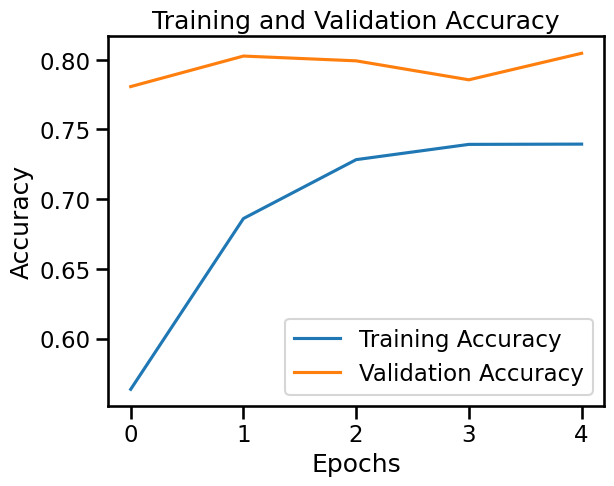

In [169]:
# Assume 'history_2' contains the history of the model with LR schedule
history = history_2

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

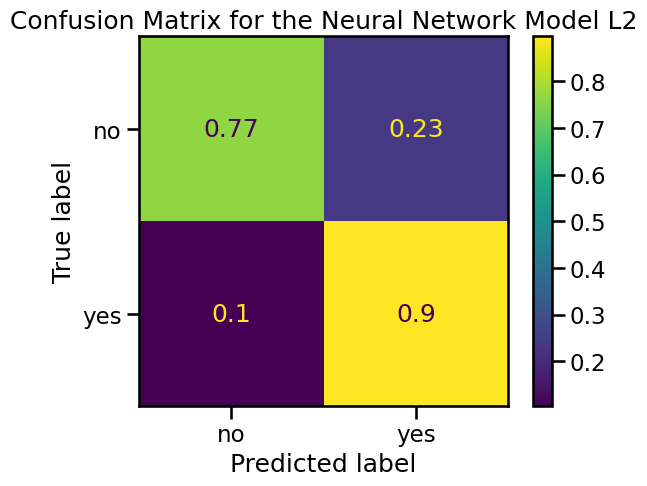

In [170]:
# Confusion Matrix for NN Model_2
cf_matrix = confusion_matrix(y_val, l2_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.title("Confusion Matrix for the Neural Network Model L2")
plt.show()

## __Proposed Model # 3. Feed Forward Neural Network (FFNN Model_3)__

## FFNN Model_3, with Fine-Tune Scenario #1

Let's create, fine-tune, train, and evaluate a Feed Forward Neural Network (FFNN) for this problem. We will use the data that has already been preprocessed and resampled. Here is a structured approach to implement this:

**Model Definition:**

1.- I will define an Feed Forward Neural Network with multiple dense layers, dropout for regularization, and ReLU activations.

2.- I will fine tune with three different model-scenarios focused on Learning Rate based in exponential-decay, step-decay,  and Dropout

In [171]:
# Define FFNN model_3, with Fine Tune scenario #1

def create_ffnn(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_dim = X_train_res.shape[1]
ffnn_model = create_ffnn(input_dim)


# Exponential decay learning function

def lr_scheduler(epoch, lr):
    decay_rate = 0.96
    decay_steps = 5
    if epoch % decay_steps == 0 and epoch:
        return lr * decay_rate
    return lr

# Create the model
input_dim = X_train_res.shape[1]
ffnn_model = create_ffnn(input_dim)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
custom_lr_scheduler = LearningRateScheduler(lr_scheduler)

# Train the model

history_ffnn = ffnn_model.fit(X_train_res, y_train_res, 
                              validation_data=(X_val_processed, y_val), 
                              epochs=50, batch_size=32, 
                              callbacks=[early_stopping, custom_lr_scheduler])

Epoch 1/50


C:\Users\jwhin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1996/1996 ━━━━━━━━━━━━━━━━━━━━ 4s 990us/step - accuracy: 0.8043 - loss: 0.8792 - val_accuracy: 0.8048 - val_loss: 0.4734 - learning_rate: 0.0010
Epoch 2/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.8480 - loss: 0.4234 - val_accuracy: 0.8148 - val_loss: 0.4508 - learning_rate: 0.0010
Epoch 3/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8535 - loss: 0.4111 - val_accuracy: 0.7985 - val_loss: 0.4788 - learning_rate: 0.0010
Epoch 4/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.8552 - loss: 0.4088 - val_accuracy: 0.8128 - val_loss: 0.4581 - learning_rate: 0.0010
Epoch 5/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.8580 - loss: 0.4025 - val_accuracy: 0.8223 - val_loss: 0.4321 - learning_rate: 0.0010
Epoch 6/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.8591 - loss: 0.3979 - val_accuracy: 0.8162 - val_loss: 0.4480 - learning_rate: 9.6000e-04
Epoch 7/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.860

In [173]:
# Predictions
y_pred_3_1 = ffnn_model.predict(X_val_processed)
l3_1_preds = (y_pred_3 > 0.5).astype(int)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


## Performance Analysis for FFNN model_3, with Fine-Tune scenario #1

In [174]:
# Evaluate model_3_1
print(classification_report(y_val, l3_1_preds))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_3_1))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7982
           1       0.46      0.83      0.59      1058

    accuracy                           0.86      9040
   macro avg       0.72      0.85      0.75      9040
weighted avg       0.91      0.86      0.88      9040

ROC-AUC Score: 0.9196027190668608


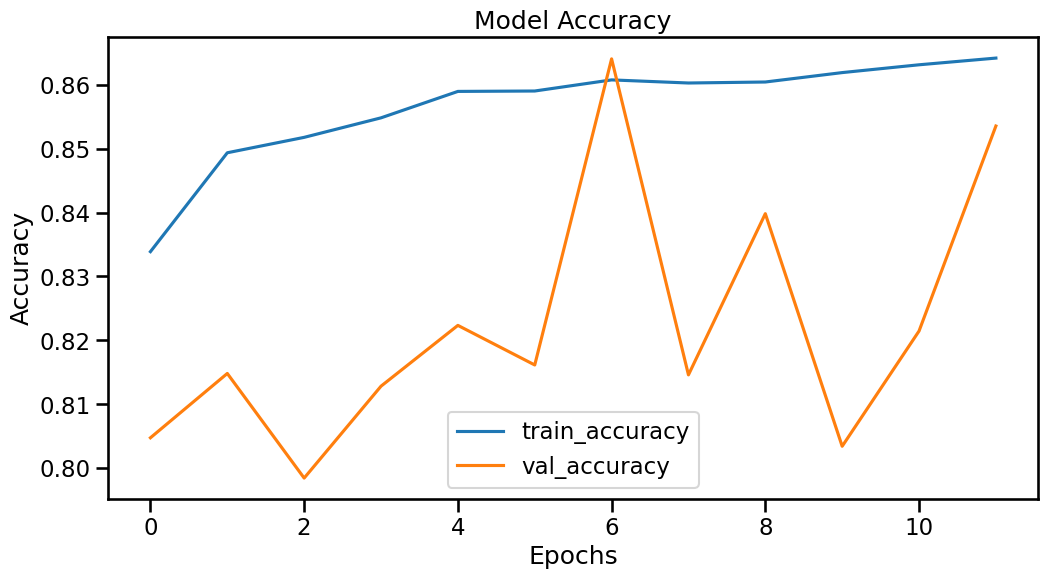

In [175]:
# Plotting training history
plt.figure(figsize=(12, 6))
plt.plot(history_ffnn.history['accuracy'], label='train_accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

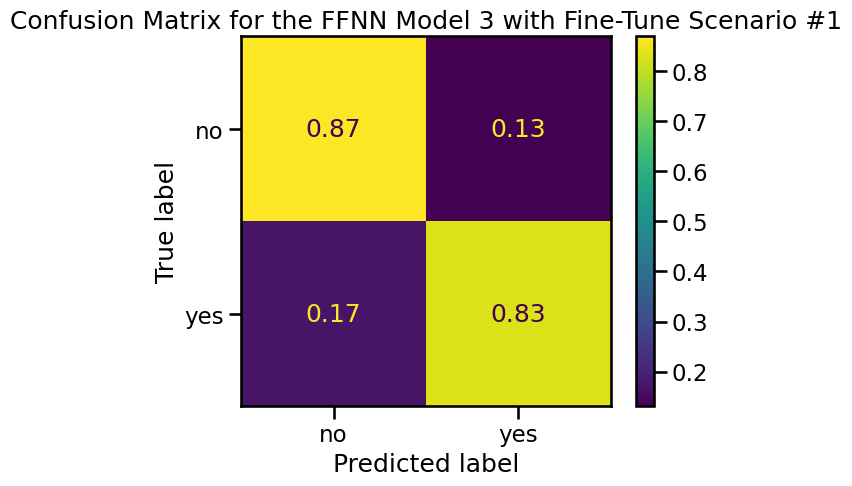

In [176]:
# Confusion Matrix for for FFNN model_3, with Fine-Tune scenario #1
cf_matrix = confusion_matrix(y_val, l3_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.title("Confusion Matrix for the FFNN Model 3 with Fine-Tune Scenario #1")
plt.show()

## FFNN Model_3, with Fine-Tune Scenario #2 

In [177]:
# Define exponential decay function for learning rate

def exp_decay(epoch):
    initial_lr = 0.001
    k = 0.1
    lr = initial_lr * np.exp(-k * epoch)
    return lr


# Define FFNN model
def create_ffnn(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_dim = X_train_res.shape[1]
ffnn_model = create_ffnn(input_dim)


# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(exp_decay)

# Train the model
history_ffnn = ffnn_model.fit(X_train_res, y_train_res, 
                              validation_data=(X_val_processed, y_val), 
                              epochs=50, batch_size=32, 
                              callbacks=[early_stopping, lr_scheduler])

Epoch 1/50


C:\Users\jwhin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1996/1996 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8176 - loss: 0.5416 - val_accuracy: 0.8306 - val_loss: 0.4109 - learning_rate: 0.0010
Epoch 2/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3620 - val_accuracy: 0.8655 - val_loss: 0.3441 - learning_rate: 9.0484e-04
Epoch 3/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8789 - loss: 0.3399 - val_accuracy: 0.8570 - val_loss: 0.3524 - learning_rate: 8.1873e-04
Epoch 4/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8839 - loss: 0.3312 - val_accuracy: 0.8441 - val_loss: 0.3819 - learning_rate: 7.4082e-04
Epoch 5/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8907 - loss: 0.3177 - val_accuracy: 0.8624 - val_loss: 0.3461 - learning_rate: 6.7032e-04
Epoch 6/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8942 - loss: 0.3072 - val_accuracy: 0.8605 - val_loss: 0.3473 - learning_rate: 6.0653e-04
Epoch 7/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0

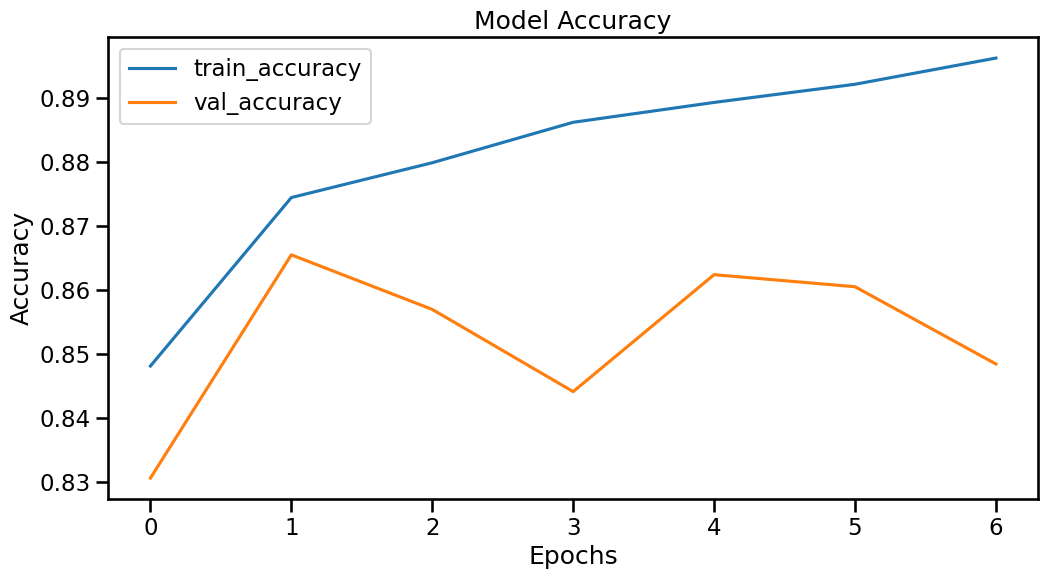

In [178]:
# Plotting training history
plt.figure(figsize=(12, 6))
plt.plot(history_ffnn.history['accuracy'], label='train_accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [179]:
# Predictions
y_pred_3_2 = ffnn_model.predict(X_val_processed)
l3_2_preds = (y_pred_3 > 0.5).astype(int)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## Performance Analysis for FFNN Model 3 with Fine-Tune Scenario #2

In [180]:
# Evaluate model
print(classification_report(y_val, l3_2_preds))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_3_2))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7982
           1       0.46      0.83      0.59      1058

    accuracy                           0.86      9040
   macro avg       0.72      0.85      0.75      9040
weighted avg       0.91      0.86      0.88      9040

ROC-AUC Score: 0.9241525947559706


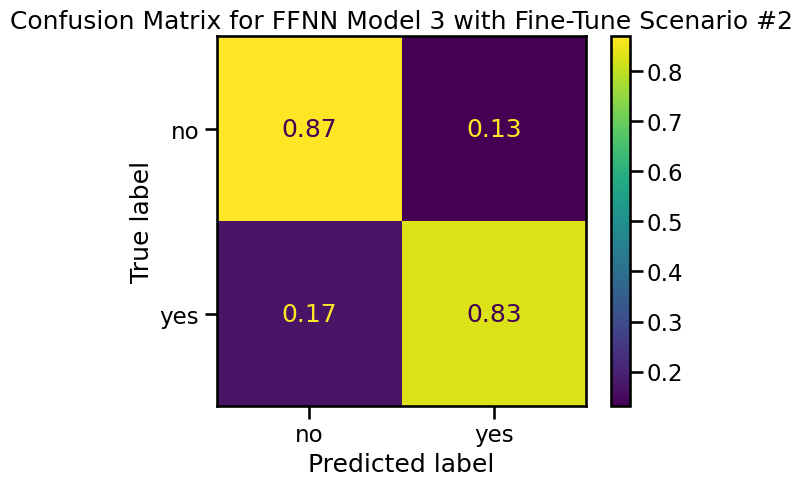

In [181]:
# Confusion Matrix for FFNN Model_3
cf_matrix = confusion_matrix(y_val, l3_2_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.title("Confusion Matrix for FFNN Model 3 with Fine-Tune Scenario #2")
plt.show()

# __FFNN Model_3, with Fine-Tune scenario #3__

In [182]:
import math

# Define 3rd scenario for step decay function for learning rate
def step_decay(epoch):
    initial_lrate = 0.001  # Initial learning rate
    drop = 0.9
    epochs_drop = 12.0  # gradual decay rate
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# Define FFNN model
def create_ffnn(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.9))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.9))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.9))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.01)  # Start with a higher initial learning rate
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_dim = X_train_res.shape[1]
ffnn_model = create_ffnn(input_dim)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(step_decay)


# Train the model
history_ffnn = ffnn_model.fit(X_train_res, y_train_res, 
                              validation_data=(X_val_processed, y_val), 
                              epochs=50, batch_size=32, 
                              callbacks=[early_stopping, lr_scheduler])

Epoch 1/50


C:\Users\jwhin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1996/1996 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5171 - loss: 1.1829 - val_accuracy: 0.8816 - val_loss: 0.7574 - learning_rate: 0.0010
Epoch 2/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.6112 - loss: 0.7387 - val_accuracy: 0.8834 - val_loss: 0.6198 - learning_rate: 0.0010
Epoch 3/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.7075 - loss: 0.6492 - val_accuracy: 0.8760 - val_loss: 0.5724 - learning_rate: 0.0010
Epoch 4/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.7302 - loss: 0.6104 - val_accuracy: 0.8605 - val_loss: 0.5991 - learning_rate: 0.0010
Epoch 5/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.7429 - loss: 0.6003 - val_accuracy: 0.8719 - val_loss: 0.5652 - learning_rate: 0.0010
Epoch 6/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.7417 - loss: 0.5976 - val_accuracy: 0.8674 - val_loss: 0.5581 - learning_rate: 0.0010
Epoch 7/50
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.7473 - 

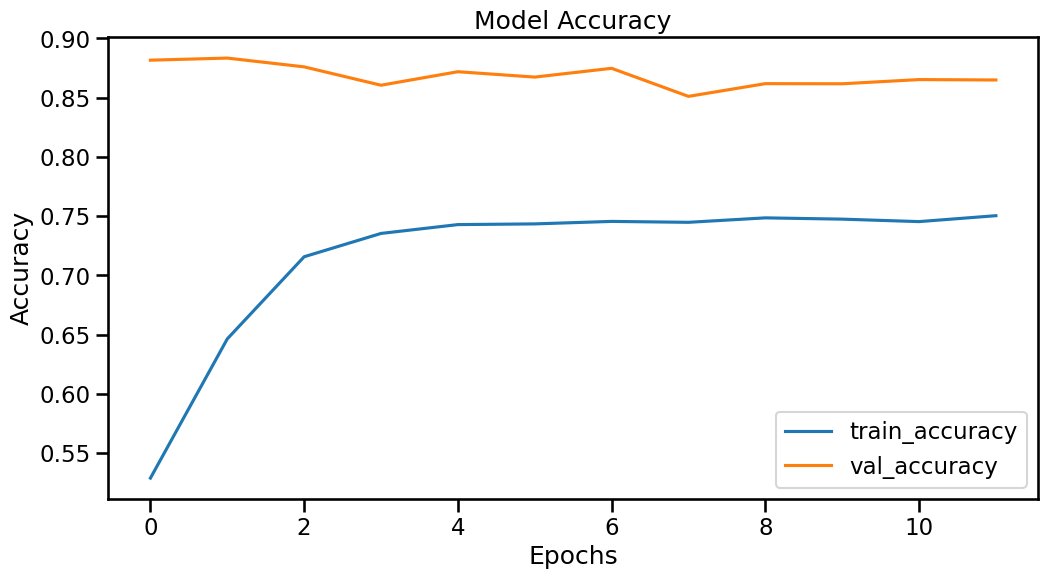

In [183]:
# Plotting training history
plt.figure(figsize=(12, 6))
plt.plot(history_ffnn.history['accuracy'], label='train_accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [184]:
# Predictions
y_pred_3_3 = ffnn_model.predict(X_val_processed)
l3_3_preds = (y_pred_3 > 0.5).astype(int)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


## Performance Analysis for FFNN Model 3 with Fine-Tune Scenario #3

In [185]:
# Evaluate model_3-3
print(classification_report(y_val, l3_3_preds))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_3_3))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7982
           1       0.46      0.83      0.59      1058

    accuracy                           0.86      9040
   macro avg       0.72      0.85      0.75      9040
weighted avg       0.91      0.86      0.88      9040

ROC-AUC Score: 0.909722383396669


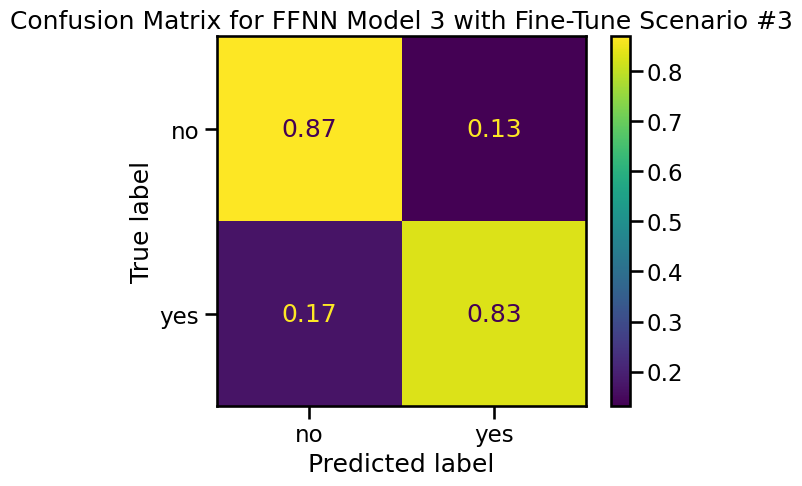

In [186]:
# Confusion Matrix for FFNN Model_3
cf_matrix = confusion_matrix(y_val, l3_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.title("Confusion Matrix for FFNN Model 3 with Fine-Tune Scenario #3")
plt.show()